# Import revelant libraries

* pykitti to handle the kitti dataset.
* Numpy for math computations.
* open3d to visualize 3D point clouds.

In [7]:
import pykitti
import numpy as np
import cv2
import matplotlib.pyplot as plt
import open3d

import os

# Loading the dataset and Calibration matrices

In [10]:
# Load the dataset giving the folder, data and sample

basedir = os.getcwd() # /home/sherlock/Documents/Kitti
date = '2011_09_26'
# Drive must coincide with the one listed in the folder
drive = '0005'

# Load the dataset
dataset = pykitti.raw(basedir, date, drive)
# Read the frame number 15 of the dataset
img = plt.imread("/home/sherlock/Documents/Kitti/2011_09_26/2011_09_26_drive_0005_sync/"
                 "image_02/data/0000000015.png")
# Read the point cloud number 15 of the dataset
Velopoints = dataset.get_velo(15) 

dataset.calib.
# Loading the calibration matrices
P_rect_20 = dataset.calib.P_rect_20 # Projection matrix  P_20 from Cam0 to Cam2 rectified
R_rect_20 = dataset.calib.R_rect_20 # Rotation matrix C_20 from Cam0 to Cam2 rectified
T_rect_20 = dataset.calib.T_cam0_velo_unrect # Transformation matrix T_cam0Velo from Velo to C

print('P_rect_20')
P_rect_20 = np.matrix(P_rect_20)
print(P_rect_20, P_rect_20.shape, type(P_rect_20))
print('R_rect_20')
R_rect_20 = np.matrix(R_rect_20)
print(R_rect_20, R_rect_20.shape, type(R_rect_20))
print('T_rect_20')
T_rect_20 = np.matrix(T_rect_20)
print(T_rect_20, T_rect_20.shape, type(T_rect_20))

Velopoints = np.asarray(Velopoints, np.float32)
print('Velopoints\n',Velopoints,Velopoints.shape,type(Velopoints))

T0 = P_rect_20 * R_rect_20
T1= T0 * T_rect_20


P_rect_20
[[7.215377e+02 0.000000e+00 6.095593e+02 4.485728e+01]
 [0.000000e+00 7.215377e+02 1.728540e+02 2.163791e-01]
 [0.000000e+00 0.000000e+00 1.000000e+00 2.745884e-03]] (3, 4) <class 'numpy.matrix'>
R_rect_20
[[ 9.998817e-01  1.511453e-02 -2.841595e-03  0.000000e+00]
 [-1.511724e-02  9.998853e-01 -9.338510e-04  0.000000e+00]
 [ 2.827154e-03  9.766976e-04  9.999955e-01  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]] (4, 4) <class 'numpy.matrix'>
T_rect_20
[[ 7.533745e-03 -9.999714e-01 -6.166020e-04 -4.069766e-03]
 [ 1.480249e-02  7.280733e-04 -9.998902e-01 -7.631618e-02]
 [ 9.998621e-01  7.523790e-03  1.480755e-02 -2.717806e-01]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]] (4, 4) <class 'numpy.matrix'>
Velopoints
 [[17.386  0.018  0.797  0.38 ]
 [17.426  0.072  0.798  0.29 ]
 [17.418  0.127  0.798  0.52 ]
 ...
 [ 3.656 -1.376 -1.705  0.35 ]
 [ 3.653 -1.361 -1.702  0.   ]
 [ 3.678 -1.358 -1.712  0.   ]] (123103, 4) <class 'numpy.ndarray'>


In [3]:
Velopoints = Velopoints[::2]
#x: forward
idx = Velopoints[:,0]<5
Velopoints = np.delete(Velopoints, np.where(idx),0)

Velopoints3P = Velopoints[:,0:3]
Velopoints_getvalues = Velopoints3P
np.savetxt('Raw_PointCloud_Total'+'txt', Velopoints3P, delimiter=' ')

print(type(Velopoints3P),Velopoints3P.shape)
Velopoints3P_3D_Plot = Velopoints3P

(<type 'numpy.ndarray'>, (18273, 3))


In [4]:
dim_M = T1.shape[0]
dim_N = T1.shape[1]
print('M',dim_M,' ','N',dim_N,'\n')

if Velopoints3P.shape[1] < dim_N:
    ones_vect_Velo3p = np.ones ((Velopoints3P.shape[0], 1),int)
    Velopoints3P = np.concatenate ((Velopoints3P, ones_vect_Velo3p), axis = 1)

Velopoints3P = np.matrix(Velopoints3P)
print'Velopoints3P or Velopoints3PP: \n',Velopoints3P,Velopoints3P.shape,type(Velopoints3P)
Velopoints3PP = Velopoints3P

('M', 3, ' ', 'N', 4, '\n')
Velopoints3P or Velopoints3PP: 
[[ 1.73859997e+01  1.79999992e-02  7.96999991e-01  1.00000000e+00]
 [ 1.74179993e+01  1.27000004e-01  7.97999978e-01  1.00000000e+00]
 [ 1.75629997e+01  2.38999993e-01  8.02999973e-01  1.00000000e+00]
 ...
 [ 1.99570007e+01  5.47499990e+00 -9.53400040e+00  1.00000000e+00]
 [ 1.98560009e+01  5.58199978e+00 -9.50100040e+00  1.00000000e+00]
 [ 1.97889996e+01  5.69700003e+00 -9.48600006e+00  1.00000000e+00]] (18273, 4) <class 'numpy.matrix'>


In [5]:
Velopoints3P = np.transpose(Velopoints3P)
print('Velopoints3P Transpose',' ', Velopoints3P.shape, '\n')

y = (T1 * Velopoints3P)
y = np.transpose(y)
print('y: ',y, y.shape, type(y),'\n')
y_final = y

('Velopoints3P Transpose', ' ', (4, 18273), '\n')
('y: ', matrix([[10518.97185993,  2503.02662572,    17.12613244],
        [10460.26119552,  2509.4899662 ,    17.15865446],
        [10468.65717331,  2533.76599145,    17.30423471],
        ...,
        [ 8204.3091065 , 10467.56224459,    19.57962404],
        [ 8065.40719869, 10426.68662538,    19.47959396],
        [ 7941.6519804 , 10405.06399851,    19.41334741]]), (18273, 3), <class 'numpy.matrix'>, '\n')


In [6]:
x_y = y[:,0:dim_M-1]
b_ones = np.ones((1, dim_M-1),int)
z = y[:,dim_M-1]
p_out = np.divide(x_y, np.multiply(z , b_ones))
print(p_out, p_out.shape , type(p_out))

idx_p_out = np.arange(0,p_out.shape[0], 1)
print(idx_p_out.shape)

(matrix([[614.20591593, 146.152474  ],
        [609.62013201, 146.25214188],
        [604.97660551, 146.42462001],
        ...,
        [419.02281118, 534.61507861],
        [414.04390745, 535.26201043],
        [409.08205135, 535.97474876]]), (18273, 2), <class 'numpy.matrix'>)
(18273,)


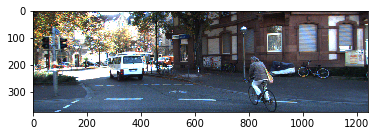

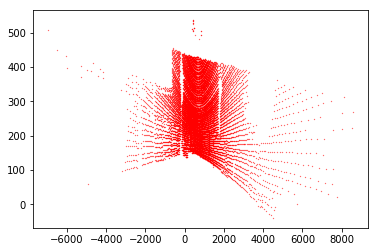

In [7]:
imgplot = plt.imshow(img)
#plt.axis("off")
plt.show()
x = p_out[:,0]
y = p_out[:,1]
plt.plot(x,y,'r.',markersize = 0.5)

('img_x', 1242, 'img_y', 375, '\n')
('pout_fty,', matrix([[614.20591593, 146.152474  ],
        [609.62013201, 146.25214188],
        [604.97660551, 146.42462001],
        ...,
        [633.83475206, 371.49192476],
        [629.08016995, 371.59754397],
        [624.31248219, 371.60965363]]), (10136, 2))
('idx_p_outtt', array([    0,     1,     2, ..., 17168, 17169, 17170]), (10136,))
('pout_fty_int', matrix([[614, 146],
        [610, 146],
        [605, 146],
        ...,
        [634, 371],
        [629, 372],
        [624, 372]]), (10136, 2), <class 'numpy.matrix'>)


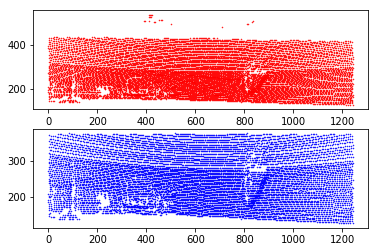

In [8]:
img_x = img.shape[1]
img_y = img.shape[0]
print ('img_x',img_x,'img_y',img_y,'\n')

# Evaluation of the column x for identifying the values outside the image rank
pointxt = np.logical_or(x < 0, x > img_x)
idex = np.where(np.logical_not(pointxt))[0]
pout_ft = p_out[idex,:] # Puntos como tal

#Index of point clouds
idx_p_outt = idx_p_out[idex]
xa = pout_ft[:,0]
yb = pout_ft[:,1]

pointyt = np.logical_or(yb < 0,yb > img_y)
idexy = np.where(np.logical_not(pointyt))[0]
pout_fty = pout_ft[idexy,:]

print('pout_fty,',pout_fty, pout_fty.shape)
idx_p_outtt = idx_p_outt[idexy]
print('idx_p_outtt',idx_p_outtt, idx_p_outtt.shape)

xaa = pout_fty[:,0]
ybb = pout_fty[:,1]

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(xa,yb,'r.',markersize = 1)

ax2 = fig.add_subplot(212)
ax2.plot(xaa,ybb,'b.',markersize = 1)

pout_fty = np.matrix.round(pout_fty)
pout_fty = pout_fty.astype(int)
print('pout_fty_int',pout_fty, pout_fty.shape, type(pout_fty))


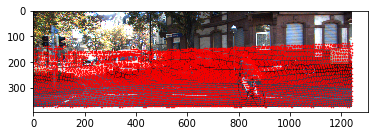

In [9]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(img)
plt.plot(pout_fty[:,0], pout_fty[:,1],'r.',markersize=1)


In [10]:
matrix_points = np.zeros((img.shape[0], img.shape[1]))
print(matrix_points.shape)

for i in range(0,pout_fty.shape[0]):
    x = pout_fty[i,0] 
    y = pout_fty[i,1]
    
    #idx_p_outtt-> index
    
    ppoints = Velopoints3PP[idx_p_outtt[i],0:3]
    matrix_points[y-1,x-1] = np.sqrt(np.power( ppoints[:,0], 2)+ np.power( ppoints[:,1], 2) + np.power(ppoints[:,2], 2))

#np.savetxt('Data_set_pointcloud'+'.csv', matrix_points, delimiter=',')
print('Matrix with point',matrix_points.shape)

(375, 1242)
('Matrix with point', (375, 1242))


In [11]:
#Reflectancia r
Velopoints3PP[:,0:1]

matrix([[17.38599968],
        [17.41799927],
        [17.56299973],
        ...,
        [19.95700073],
        [19.8560009 ],
        [19.78899956]])

<type 'list'>
<type 'list'>


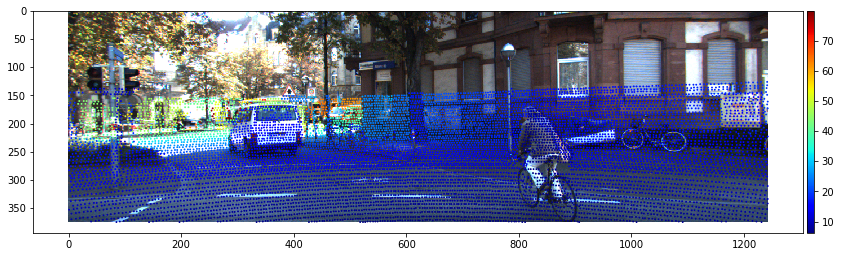

In [12]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots()
imgplot = ax.imshow(img)
fig.set_size_inches(14, 10)

c = pout_fty[:,0].tolist()
print(type(c))
d = pout_fty[:,1].tolist()
f = Velopoints3PP[:,0:3]
f = f[idx_p_outtt]   
f = np.sqrt(np.power(f[:,0], 2)+ np.power(f[:,1], 2) + np.power(f[:,2], 2))
f = f.tolist()
print(type(f))

image_new = img
img = ax.scatter(c,d, s= 3, marker=".",c=f, cmap=plt.cm.jet)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.05)
plt.colorbar(img, cax=cax)

plt.show()